In [3]:
#!pip install gradio mediapipe opencv-python matplotlib

In [43]:
import cv2
import mediapipe as mp
import numpy as np

In [44]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    cv2.imshow('Selfie Segment', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [45]:
mp_selfie = mp.solutions.selfie_segmentation

In [46]:
cap = cv2.VideoCapture(0)

with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        ret, frame = cap.read()
        ## segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True
        
        cv2.imshow('Selfie Segment', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [47]:
res.segmentation_mask

array([[3.8398057e-01, 3.8667408e-01, 3.9744800e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.8563555e-01, 3.8811740e-01, 3.9804474e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.8857779e-01, 3.9068332e-01, 3.9910555e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.7519410e-01, 3.7499338e-01, 3.7419054e-01, ..., 1.3614738e-19,
        2.7229484e-20, 0.0000000e+00],
       [3.8113293e-01, 3.8062379e-01, 3.7858722e-01, ..., 5.7181884e-19,
        1.1436379e-19, 0.0000000e+00],
       [3.8447353e-01, 3.8379088e-01, 3.8106033e-01, ..., 8.1688408e-19,
        1.6337686e-19, 0.0000000e+00]], dtype=float32)

In [48]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

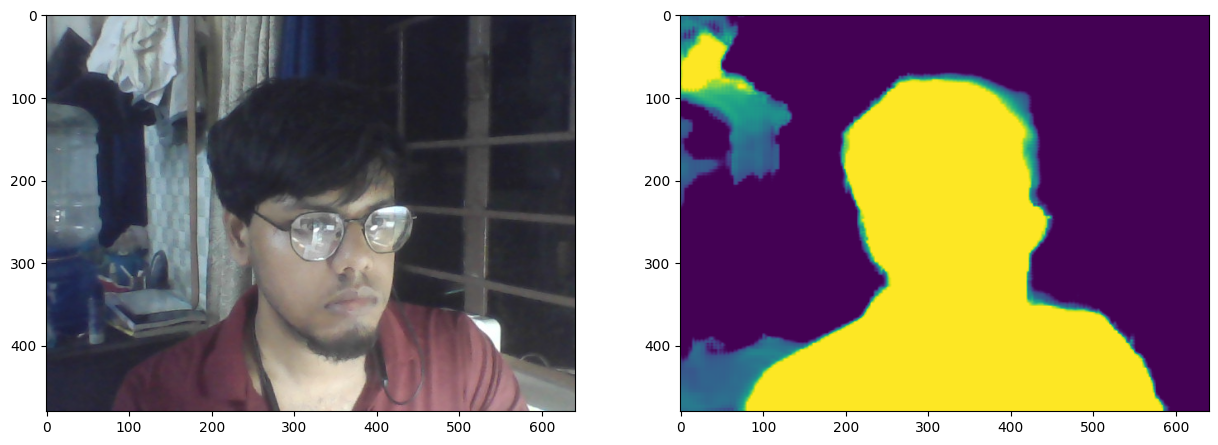

In [49]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [50]:
background = np.zeros(frame.shape,dtype=np.uint8) ##black image
mask = np.stack((res.segmentation_mask,)*3,axis=-1) > 0.5

In [51]:
segmented_image = np.where(mask,frame,background)

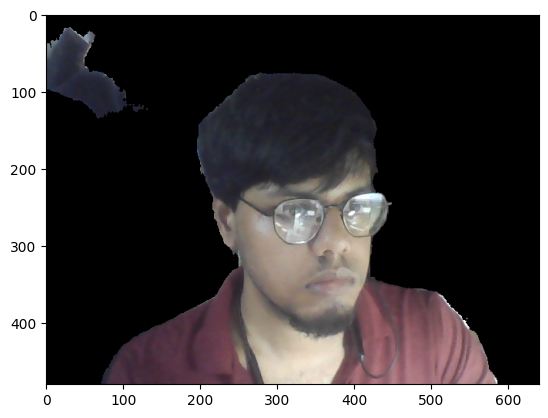

In [52]:
plt.imshow(segmented_image)

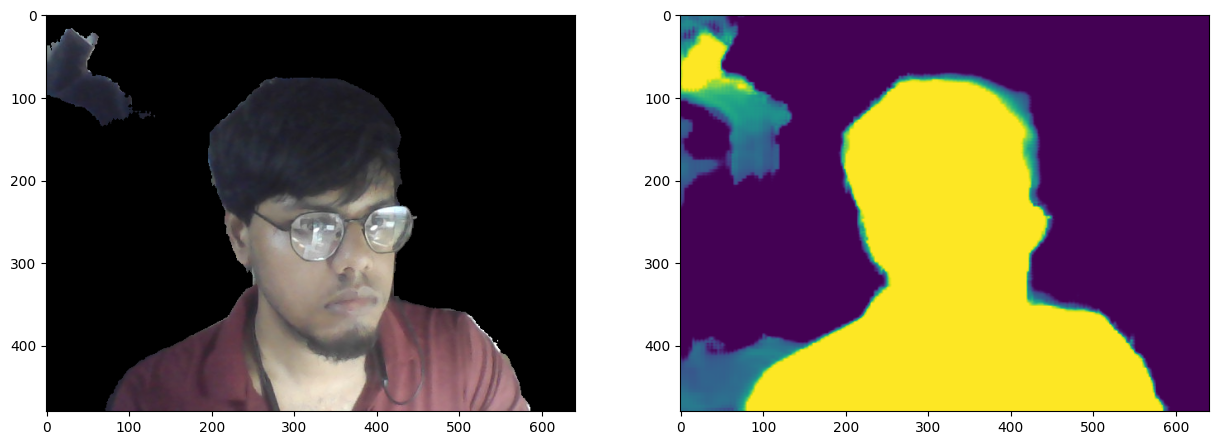

In [53]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax0.imshow(segmented_image)
ax1.imshow(res.segmentation_mask)
plt.show()

In [54]:
segmented_image = np.where(mask,frame,cv2.blur(frame,(40,40)))

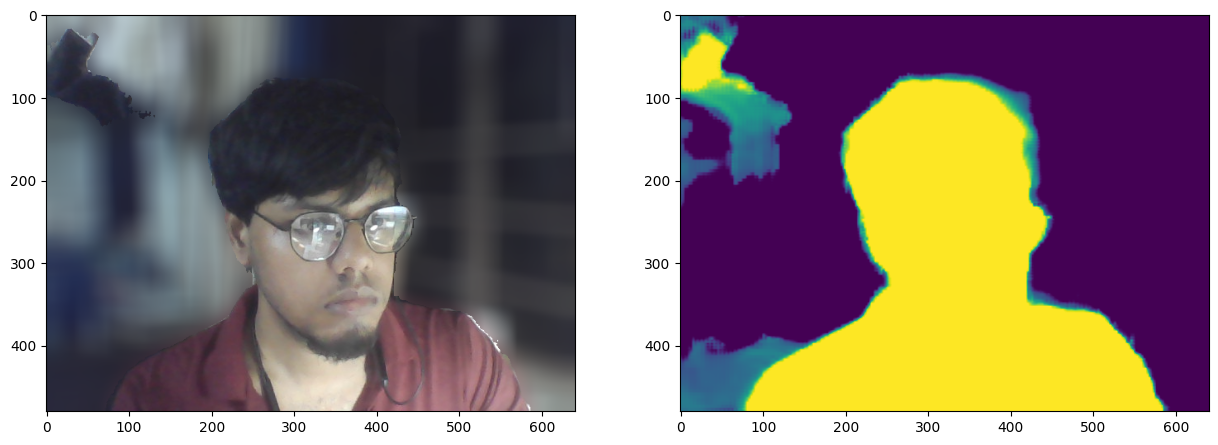

In [55]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax0.imshow(segmented_image)
ax1.imshow(res.segmentation_mask)
plt.show()